In [1]:
# keras.io code:
from keras.layers import Dense
output_layer = Dense(10)

# corresponding tf.keras code:
from tensorflow.keras.layers import Dense
output_layer = Dense(10)
# or:
from tensorflow import keras
output_layer = keras.layers.Dense(10)

In [2]:
%matplotlib inline
%load_ext tensorboard

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras  # tf.keras
import time

In [4]:
print("python", sys.version)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

python 3.7.9 | packaged by conda-forge | (default, Feb 13 2021, 20:03:11) 
[GCC 9.3.0]
matplotlib 3.4.0
numpy 1.19.5
pandas 1.2.2
sklearn 0.24.1
tensorflow 2.4.1
tensorflow.keras 2.4.0


In [5]:
assert sys.version_info >= (3, 5) # Python ≥3.5 required
assert tf.__version__ >= "2.0"    # TensorFlow ≥2.0 required

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data())
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
X_train.shape

(55000, 28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  44, 127,
        182, 185, 161, 120,  55,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 198, 251, 255,
        251, 249, 247, 255, 252, 214, 100,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,   0, 233, 252, 237, 239,
        234, 237, 235, 237, 237, 254, 227,   0,   0,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  16, 210, 225, 215, 175,
        217, 216, 193, 196, 226, 221, 209,  50,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 199, 229, 232, 230, 245, 204,
        219, 253, 245, 207, 194, 223, 231, 236, 235,   0,   0,   3,   0,
          0,   0],
       [  

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

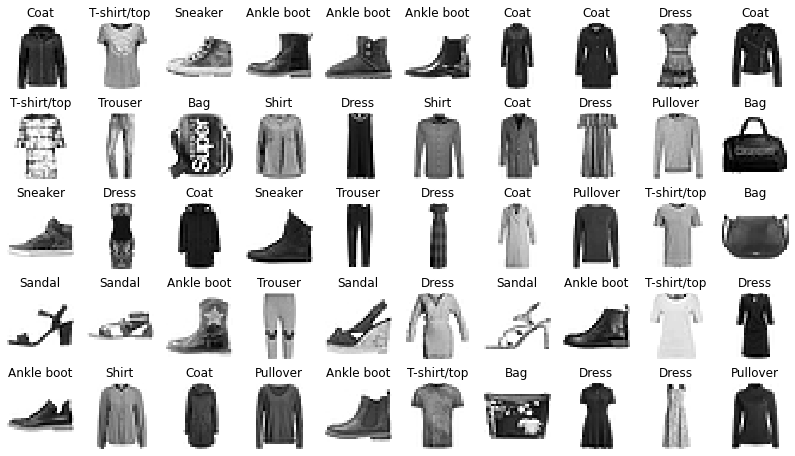

In [14]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


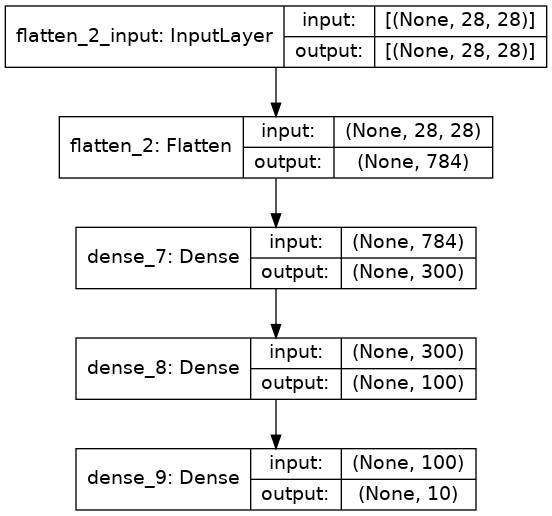

In [20]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

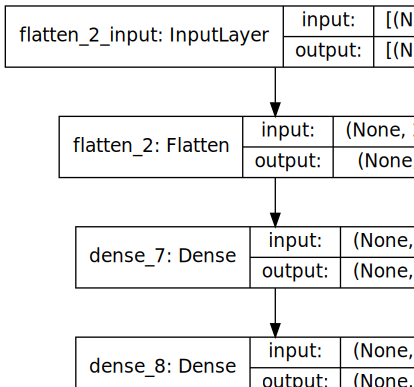

In [21]:
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 20.9749 - accuracy: 0.6147 - val_loss: 0.6349 - val_accuracy: 0.7734
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6205 - accuracy: 0.7676 - val_loss: 0.5418 - val_accuracy: 0.8070
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5144 - accuracy: 0.8124 - val_loss: 0.5120 - val_accuracy: 0.8230
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4744 - accuracy: 0.8222 - val_loss: 0.4772 - val_accuracy: 0.8316
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4391 - accuracy: 0.8365 - val_loss: 0.4557 - val_accuracy: 0.8408
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4223 - accuracy: 0.8439 - val_loss: 0.4506 - val_accuracy: 0.8434
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4100 - accuracy: 0.8501 - val_loss: 0.4414 - val_accuracy

In [24]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

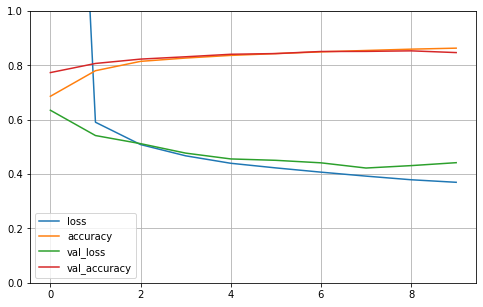

In [25]:
plot_learning_curves(history)

In [26]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3607 - accuracy: 0.8675 - val_loss: 0.4653 - val_accuracy: 0.8450
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3528 - accuracy: 0.8695 - val_loss: 0.4114 - val_accuracy: 0.8532
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3474 - accuracy: 0.8714 - val_loss: 0.4161 - val_accuracy: 0.8590
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3407 - accuracy: 0.8749 - val_loss: 0.4003 - val_accuracy: 0.8634
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3341 - accuracy: 0.8762 - val_loss: 0.4012 - val_accuracy: 0.8648
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3301 - accuracy: 0.8773 - val_loss: 0.4161 - val_accuracy: 0.8606
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3255 - accuracy: 0.8792 - val_loss: 0.4171 - val_accuracy:

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.8555


[0.4427405297756195, 0.8554999828338623]

In [28]:
n_new = 10
X_new = X_test[:n_new]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.06, 0.  , 0.03, 0.01, 0.  , 0.  , 0.9 , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.92, 0.  , 0.08, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.52, 0.  , 0.47, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [29]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1, 1, 6, 1, 2, 4, 5, 7])

In [30]:
y_pred = model.predict_classes(X_new)
y_pred

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1, 1, 6, 1, 2, 4, 5, 7])

In [31]:
y_proba.max(axis=1).round(2)

array([0.99, 0.99, 1.  , 1.  , 0.9 , 1.  , 0.92, 0.52, 0.99, 1.  ],
      dtype=float32)

In [32]:
k = 3
top_k = np.argsort(-y_proba, axis=1)[:, :k]
top_k

array([[9, 7, 5],
       [2, 6, 4],
       [1, 3, 0],
       [1, 3, 9],
       [6, 0, 2],
       [1, 3, 0],
       [2, 4, 9],
       [4, 6, 2],
       [5, 7, 1],
       [7, 5, 9]])

In [33]:
row_indices = np.tile(np.arange(len(top_k)), [k, 1]).T
y_proba[row_indices, top_k].round(2)


array([[0.99, 0.01, 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.9 , 0.06, 0.03],
       [1.  , 0.  , 0.  ],
       [0.92, 0.08, 0.  ],
       [0.52, 0.47, 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ]], dtype=float32)

In [34]:
pixel_means = X_train.mean(axis = 0)
pixel_stds = X_train.std(axis = 0)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)
X_valid_scaled = scaler.transform(X_valid.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)
X_test_scaled = scaler.transform(X_test.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)

In [36]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(1e-3), metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_data=(X_valid_scaled, y_valid))


Epoch 1/20
1719/1719 [==============================] - 5s 2ms/step - loss: 1.3011 - accuracy: 0.5750 - val_loss: 0.6304 - val_accuracy: 0.7860
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6108 - accuracy: 0.7909 - val_loss: 0.5298 - val_accuracy: 0.8198
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5216 - accuracy: 0.8177 - val_loss: 0.4846 - val_accuracy: 0.8338
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4766 - accuracy: 0.8328 - val_loss: 0.4561 - val_accuracy: 0.8460
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4428 - accuracy: 0.8430 - val_loss: 0.4373 - val_accuracy: 0.8544
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4276 - accuracy: 0.8465 - val_loss: 0.4237 - val_accuracy: 0.8560
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4133 - accuracy: 0.8498 - val_loss: 0.4125 - val_accuracy:

In [37]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3820 - accuracy: 0.8629


[0.38200902938842773, 0.8629000186920166]

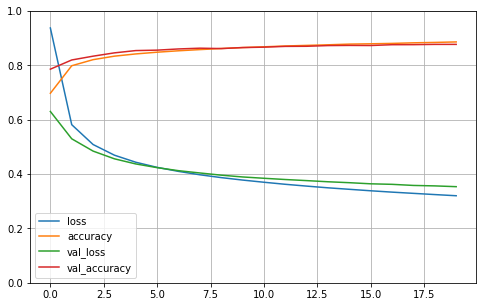

In [38]:
plot_learning_curves(history)

In [39]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [40]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(1e-3), metrics=["accuracy"])

In [41]:
logdir = os.path.join(root_logdir, "run_{}".format(time.time()))

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.EarlyStopping(patience=5),
    keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True),
]
history = model.fit(X_train_scaled, y_train, epochs=50,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=callbacks)


Epoch 1/50
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2734 - accuracy: 0.5882 - val_loss: 0.6146 - val_accuracy: 0.7902
Epoch 2/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6009 - accuracy: 0.7929 - val_loss: 0.5187 - val_accuracy: 0.8202
Epoch 3/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5149 - accuracy: 0.8177 - val_loss: 0.4756 - val_accuracy: 0.8354
Epoch 4/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4703 - accuracy: 0.8320 - val_loss: 0.4493 - val_accuracy: 0.8470
Epoch 5/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4454 - accuracy: 0.8416 - val_loss: 0.4312 - val_accuracy: 0.8522
Epoch 6/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4274 - accuracy: 0.8493 - val_loss: 0.4156 - val_accuracy: 0.8550
Epoch 7/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4060 - accuracy: 0.8552 - val_loss: 0.4059 - val_accuracy:

In [42]:
model = keras.models.load_model("my_mnist_model.h5")

In [43]:
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 0s 1ms/step - loss: 0.3150 - accuracy: 0.8820


[0.31501898169517517, 0.8820000290870667]

In [44]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [45]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [46]:
housing.data.shape

(20640, 8)

In [47]:
housing.target.shape

(20640,)

In [48]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [49]:
len(X_train), len(X_valid), len(X_test)

(11610, 3870, 5160)

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(1e-3))

In [52]:
callbacks = [keras.callbacks.EarlyStopping(patience=10)]
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_valid_scaled, y_valid), epochs=100,
                    callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 3.4283 - val_loss: 0.8806
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.7322 - val_loss: 0.6011
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6089 - val_loss: 0.5709
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5851 - val_loss: 0.5492
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5470 - val_loss: 0.5332
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5420 - val_loss: 0.5204
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5270 - val_loss: 0.5140
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4947 - val_loss: 0.5045
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4772 - val_loss: 0.4822
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4877 - val_lo

In [53]:
model.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 704us/step - loss: 0.3586


0.3585503101348877

In [54]:
model.predict(X_test_scaled)

array([[0.692727 ],
       [1.4818938],
       [3.9495704],
       ...,
       [1.5915353],
       [2.458242 ],
       [3.996081 ]], dtype=float32)

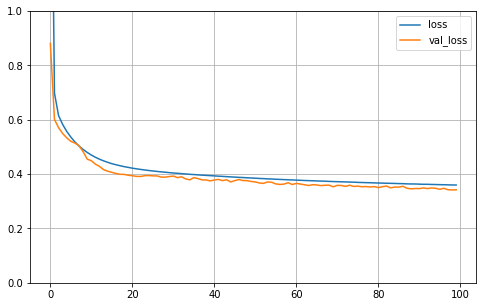

In [55]:
plot_learning_curves(history)

In [56]:
learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []
for learning_rate in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)
    ])
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    callbacks = [keras.callbacks.EarlyStopping(patience=10)]
    history = model.fit(X_train_scaled, y_train,
                        validation_data=(X_valid_scaled, y_valid), epochs=100,
                        callbacks=callbacks)
    histories.append(history) 

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 4.7931 - val_loss: 5.9682
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 3.6359 - val_loss: 6.5896
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 2.7865 - val_loss: 6.8156
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 2.2675 - val_loss: 6.7027
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 1.7839 - val_loss: 6.2839
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 1.5306 - val_loss: 5.7317
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 1.4809 - val_loss: 5.0999
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 1.2038 - val_loss: 4.3595
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 1.0673 - val_loss: 3.6239
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.9960 - val_lo

Learning rate: 0.0001


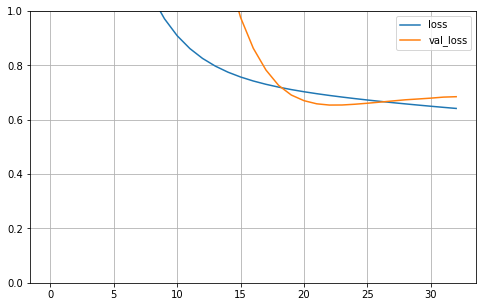

Learning rate: 0.0003


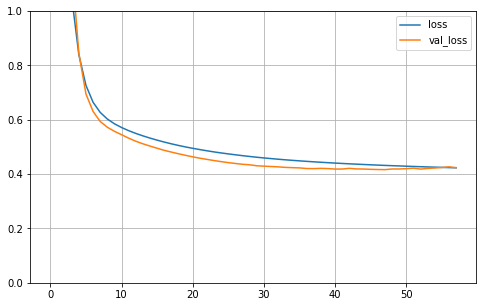

Learning rate: 0.001


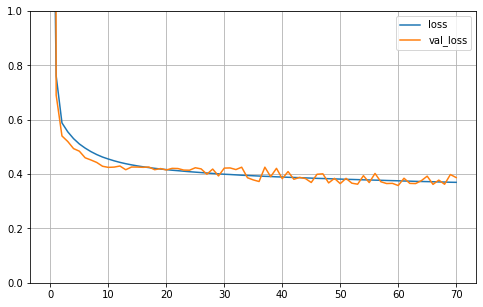

Learning rate: 0.003


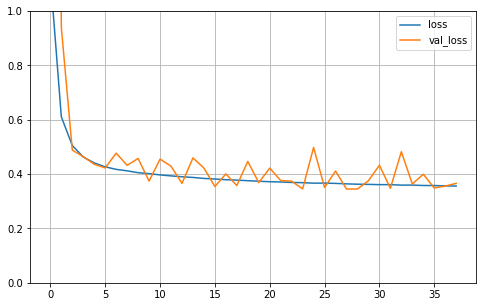

Learning rate: 0.01


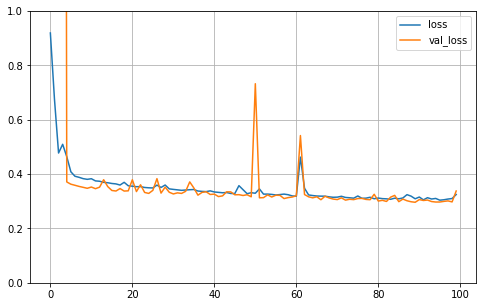

Learning rate: 0.03


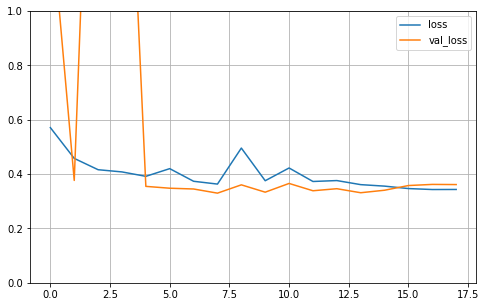

In [57]:
for learning_rate, history in zip(learning_rates, histories):
    print("Learning rate:", learning_rate)
    plot_learning_curves(history)

In [58]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3):
    model = keras.models.Sequential()
    options = {"input_shape": X_train.shape[1:]}
    for layer in range(n_hidden + 1):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [59]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [60]:
keras_reg.fit(X_train_scaled, y_train, epochs=100,
              validation_data=(X_valid_scaled, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 2.4068 - val_loss: 5.0810
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6572 - val_loss: 1.0496
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5363 - val_loss: 0.4807
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5094 - val_loss: 0.4285
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4560 - val_loss: 0.4130
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4125 - val_loss: 0.3956
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3851 - val_loss: 0.3896
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3918 - val_loss: 0.4104
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3806 - val_loss: 0.4013
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3820 - val_lo

In [61]:
keras_reg.predict(X_test_scaled)

array([0.46045828, 1.7196579 , 4.3644037 , ..., 1.4668708 , 2.3265543 ,
       4.129657  ], dtype=float32)

In [62]:
from scipy.stats import reciprocal

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

In [63]:
from sklearn.model_selection import RandomizedSearchCV

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)

In [64]:
rnd_search_cv.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [65]:
rnd_search_cv.best_score_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score_'